# **Análisis del Test de Alfabetización en IA con CTT y IRT**

**Para CCT**

Paquetes

*   psych
*   cct



**Para IRT**
Usando los paquetes mirt y ggmirt

Guia:
https://philippmasur.de/2022/05/13/how-to-run-irt-analyses-in-r/

https://github.com/masurp/ggmirt



**#################### **

**CARGA Y ANÁLISIS GENERAL DE LOS DATOS**

**#################### **

In [ ]:
install.packages("readxl")

In [34]:
# Cargar las librerías necesarias
library(readxl)

# URL del archivo Excel
url <- "https://github.com/ravellom/AI_Lit_Test_Analysis/raw/main/correcto2_0.xlsx"

### IMPORTANTE Los datos son dicotómicos [0,1]
### Han sido procesados en python con el siguinete código: https://github.com/ravellom/AI_Lit_Test_Analysis

# Ruta temporal para guardar el archivo descargado
temp_file <- tempfile(fileext = ".xlsx")

# Descargar el archivo
download.file(url, temp_file, mode = "wb") # El 'mode = "wb"' es importante para archivos binarios como .xlsx

# Leer el archivo descargado
df <- read_xlsx(temp_file)

# Cuando ya no necesites el archivo, puedes eliminar el archivo temporal
unlink(temp_file)

# Aislar solo los items

data <- data[7:36]

head(data)

New names:
• `` -> `...1`


Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,⋯,Item21,Item22,Item23,Item24,Item25,Item26,Item27,Item28,Item29,Item30
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,1,1,1,0,0,0,⋯,1,0,1,1,0,0,0,0,0,1
1,1,0,1,1,0,1,0,1,0,⋯,1,0,0,1,1,0,1,1,0,1
1,0,0,0,0,1,0,0,0,0,⋯,1,1,0,1,0,0,0,1,0,0
0,1,0,0,0,1,0,0,1,0,⋯,1,0,0,0,0,1,1,0,0,0
0,0,0,0,0,1,0,0,0,0,⋯,1,1,0,0,0,1,0,0,0,0
0,0,0,0,1,1,0,0,0,0,⋯,1,0,0,0,1,1,0,0,0,1


In [58]:
any(is.na(data))

[1] FALSE

In [35]:
sapply(data, table, useNA = "ifany")

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,⋯,Item21,Item22,Item23,Item24,Item25,Item26,Item27,Item28,Item29,Item30
0,65,59,70,60,36,21,67,70,59,63,⋯,32,45,38,59,54,53,61,46,80,55
1,18,24,13,23,47,62,16,13,24,20,⋯,51,38,45,24,29,30,22,37,3,28


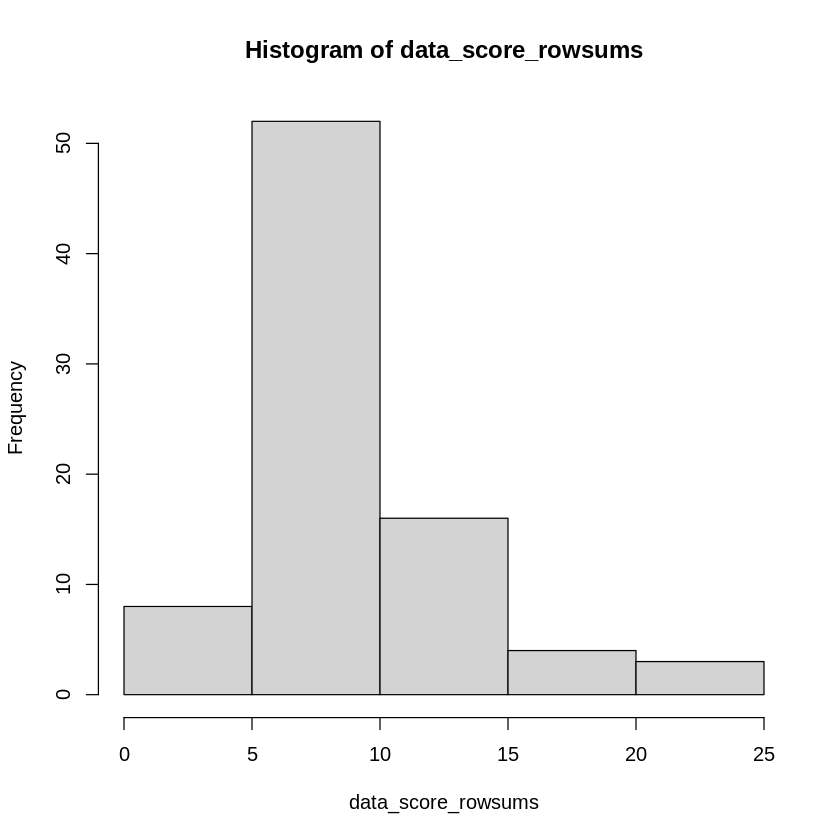

In [39]:
data_score_rowsums <- rowSums(data)
hist(data_score_rowsums)

**#################### **

# **CCT**

# Teoría clásica de los test

**#################### **

In [ ]:
install.packages("psych")

In [57]:
library(psych)
alfa <- alpha(data)
alfa

Warning message in alpha(data):
“Some items were negatively correlated with the first principal component and probably 
should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option”


Some items ( Item03 Item29 ) were negatively correlated with the first principal component and 
probably should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option


Reliability analysis   
Call: alpha(x = data)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.71      0.69    0.81     0.069 2.2 0.045 0.32 0.14    0.065

    95% confidence boundaries 
         lower alpha upper
Feldt     0.61  0.71  0.79
Duhachek  0.62  0.71  0.80

 Reliability if an item is dropped:
       raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
Item01      0.70      0.68    0.80     0.069 2.1    0.046 0.016 0.065
Item02      0.70      0.68    0.80     0.070 2.2    0.046 0.016 0.065
Item03      0.72      0.70    0.81     0.075 2.3    0.044 0.016 0.070
Item04      0.70      0.68    0.80     0.068 2.1    0.046 0.016 0.064
Item05      0.71      0.69    0.80     0.070 2.2    0.046 0.016 0.065
Item06      0.71      0.69    0.80     0.072 2.2    0.045 0.016 0.068
Item07      0.71      0.68    0.80     0.070 2.2    0.046 0.017 0.066
Item08      0.71      0.70    0.81     0.073 2.3    0.045 0.016 0.066
Item09      0.69      0.67    0.79 

In [42]:
install.packages("CTT")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [43]:
library(CTT)

In [52]:
## Ejecutamos el código con estos parámetros y asignamos el resultado a la variable data_ctt.

data2 <- as.data.frame(data)

data_ctt <- itemAnalysis(items = data2, hardFlag=.25, pBisFlag=.3)

data_ctt


 Number of Items 
 30 

 Number of Examinees 
 83 

 Coefficient Alpha 
 0.709 

In [53]:
data_ctt$itemReport

itemName,itemMean,pBis,bis,alphaIfDeleted,hard,lowPBis
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Item01,0.21686747,0.23900499,0.33541300,0.7016695,X,X
Item02,0.28915663,0.19835378,0.26307272,0.7044730,,X
Item03,0.15662651,-0.04173810,-0.06322436,0.7175551,X,X
Item04,0.27710843,0.26690214,0.35666885,0.6996265,,X
Item05,0.56626506,0.19550068,0.24626751,0.7050388,,X
Item06,0.74698795,0.12323858,0.16753435,0.7094164,,X
Item07,0.19277108,0.17624270,0.25393499,0.7056076,X,X
Item08,0.15662651,0.05167218,0.07827239,0.7124460,X,X
Item09,0.28915663,0.36426455,0.48311692,0.6925537,,


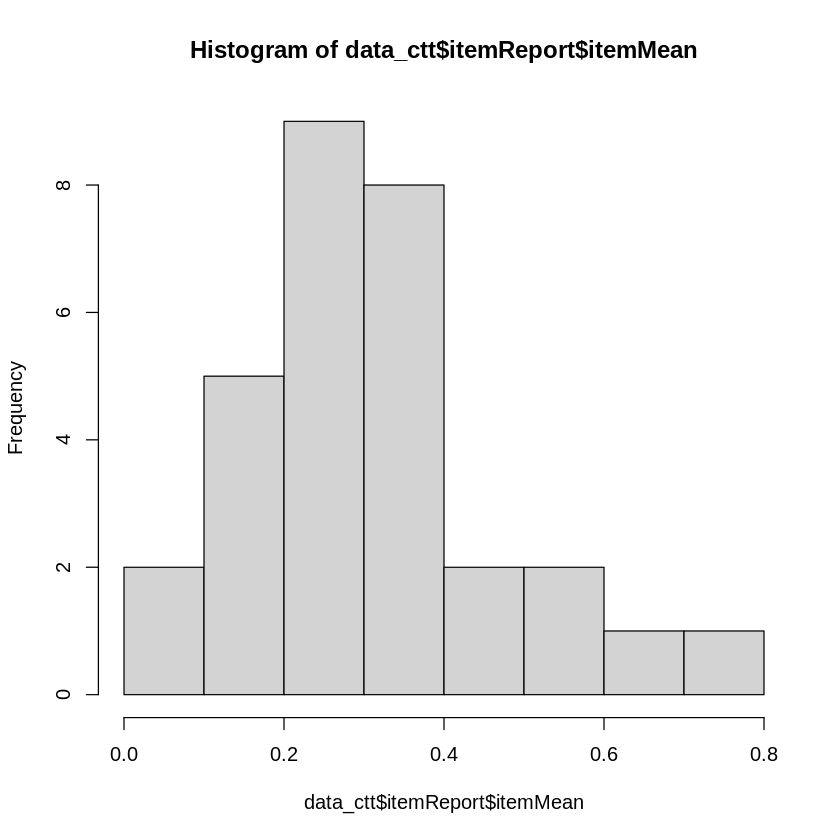

In [54]:
hist(data_ctt$itemReport$itemMean)

**#################### **

# **IRT**

# Item Response Theory

**#################### **

In [4]:
install.packages("mirt")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘permute’, ‘GPArotation’, ‘gridExtra’, ‘Rcpp’, ‘vegan’, ‘Deriv’, ‘pbapply’, ‘dcurver’, ‘RcppArmadillo’




In [6]:


# install.packages("devtools")
devtools::install_github("masurp/ggmirt")



tidyselect (1.2.0 -> 1.2.1) [CRAN]
isoband    (0.2.6 -> 0.2.7) [CRAN]
ggplot2    (3.4.4 -> 3.5.0) [CRAN]


Installing 3 packages: tidyselect, isoband, ggplot2

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpqDcxsM/remotes117accc1ab/masurp-ggmirt-4cfa106/DESCRIPTION’ ... OK
* preparing ‘ggmirt’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘ggmirt_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
# Instalar paquetes para evitar error posterior

install.packages("cowplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
# Data wrangling
library(tidyverse)

# Very comprehensive package for IRT analyses
library(mirt)

# Extension for 'mirt'
# devtools::install_github("masurp/ggmirt")
library(ggmirt)

In [36]:
##  Fitting the model

unimodel <- 'F1 = 1-30'

fit3PL <- mirt(data,
               #model = unimodel,  # alternatively, we could also just specify model = 1 in this case
               model = 1,  # alternatively, we could also just specify model = 1 in this case
               itemtype = "3PL",
               verbose = FALSE)
fit3PL

EM cycles terminated after 500 iterations.




Call:
mirt(data = data, model = 1, itemtype = "3PL", verbose = FALSE)

Full-information item factor analysis with 1 factor(s).
FAILED TO CONVERGE within 1e-04 tolerance after 500 EM iterations.
mirt version: 1.41 
M-step optimizer: BFGS 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Log-likelihood = -1294.455
Estimated parameters: 90 
AIC = 2768.909
BIC = 2986.605; SABIC = 2702.723
G2 (1073741733) = 1855.38, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN

In [11]:
##  Understanding IRT parameter

# Factor solution
summary(fit3PL)

           F1     h2
Item01  0.514 0.2639
Item02  0.387 0.1498
Item03 -0.694 0.4812
Item04  0.547 0.2993
Item05  0.212 0.0449
Item06  0.110 0.0120
Item07  0.995 0.9893
Item08  0.996 0.9922
Item09  0.614 0.3768
Item10  0.212 0.0448
Item11  1.000 0.9991
Item12  0.703 0.4945
Item13  0.604 0.3644
Item14  0.999 0.9970
Item15  0.860 0.7394
Item16  0.648 0.4194
Item17  0.779 0.6068
Item18  1.000 0.9991
Item19  0.998 0.9970
Item20  0.971 0.9435
Item21  0.508 0.2576
Item22  0.999 0.9988
Item23  0.999 0.9978
Item24  0.808 0.6534
Item25  1.000 0.9991
Item26  0.999 0.9988
Item27  0.969 0.9386
Item28  1.000 0.9991
Item29 -0.996 0.9922
Item30  0.999 0.9986

SS loadings:  20.049 
Proportion Var:  0.668 

Factor correlations: 

   F1
F1  1


In [12]:

params3PL <- coef(fit3PL, IRTpars = TRUE, simplify = TRUE)
round(params3PL$items, 2) # g = c = guessing parameter

,a,b,g,u
Item01,1.02,1.57,0.03,1
Item02,0.71,1.31,0.00,1
Item03,-1.64,-2.97,0.13,1
Item04,1.11,0.97,0.00,1
Item05,0.37,-0.80,0.00,1
Item06,0.19,-5.88,0.00,1
Item07,16.39,1.96,0.18,1
Item08,19.18,2.23,0.15,1
Item09,1.32,0.80,0.00,1
Item10,0.37,3.12,0.00,1


In [13]:
## Model fit, person fit, and item fit evaluation

M2(fit3PL)

,M2,df,p,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,424.028,375,0.04077361,0.03993001,0.009068842,0.0577502,0.1047943,0.8210843,0.8457623


In [14]:
itemfit(fit3PL)

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Item01,11.3464646,5,0.12441536,0.04492725
Item02,12.5954138,6,0.11578131,0.04993012
Item03,3.0575518,4,0.00000000,0.54824086
Item04,9.8430079,5,0.10868401,0.07980774
Item05,11.5396059,7,0.08893099,0.11675231
Item06,9.7861573,5,0.10804422,0.08152616
Item07,6.4401271,6,0.02990932,0.37573219
Item08,3.5047447,4,0.00000000,0.47715726
Item09,4.3099429,5,0.00000000,0.50570760


In [15]:
itemfit(fit3PL, fit_stats = "infit") # typical for Rasch modeling

item,outfit,z.outfit,infit,z.infit
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Item01,9.418319e-01,-0.206180466,9.940359e-01,0.017771057
Item02,9.402988e-01,-0.377507087,9.840873e-01,-0.101981319
Item03,1.008183e+00,0.110222986,1.013952e+00,0.136181189
Item04,8.907935e-01,-0.470258371,9.657308e-01,-0.210847557
Item05,9.852193e-01,-0.300506431,9.871745e-01,-0.284919268
Item06,9.992134e-01,0.036442670,9.962333e-01,0.011462947
Item07,9.709237e-01,-0.087889547,9.786171e-01,-0.054858396
Item08,9.809971e-01,0.004863307,9.915883e-01,0.034630984
Item09,8.181112e-01,-0.714568124,9.666832e-01,-0.195420637


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


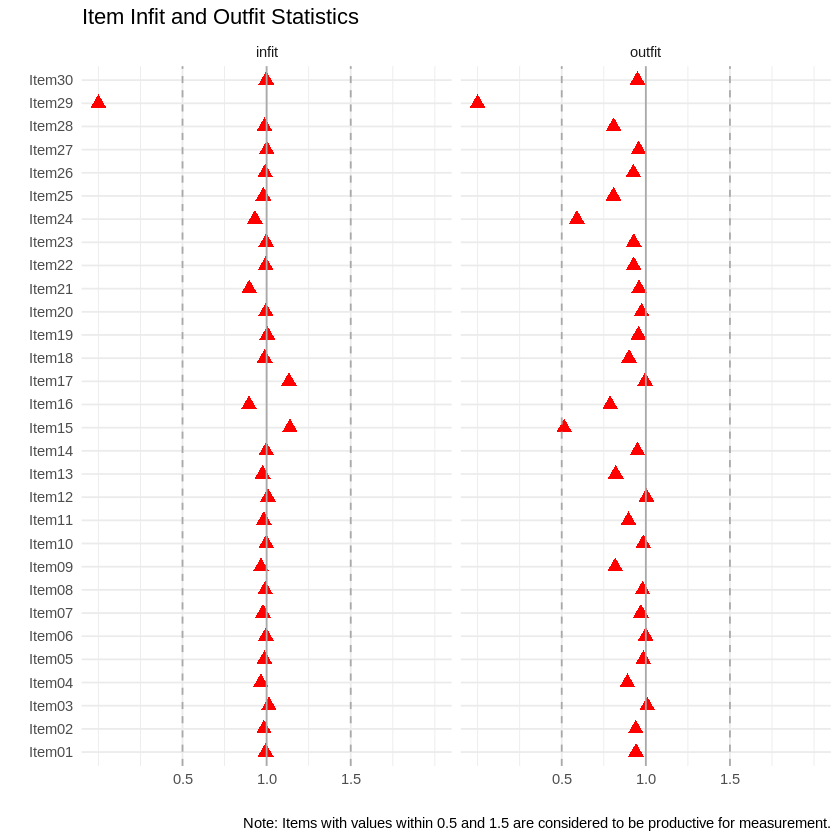

In [16]:
itemfitPlot(fit3PL)

In [17]:
## Assessing person fit

head(personfit(fit3PL))

,outfit,z.outfit,infit,z.infit,Zh
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0033365,0.1210845,1.0829574,0.4548267,-0.3599150
2,0.8860905,-0.3010556,1.0551004,0.3630982,-0.2317668
3,0.7499763,-0.7941196,0.8501858,-0.7068416,0.7506424
4,0.9917493,0.1016092,1.1288176,0.6435400,-0.4827503
5,0.4169365,-1.0249942,0.5711287,-2.0953531,1.7810312
6,0.7196532,-0.3818847,0.9158789,-0.2956026,0.4712573


In [59]:
personfit(fit3PL) %>%
  reframe(infit.outside = prop.table(table(z.infit > 1.96 | z.infit < -1.96)),
            outfit.outside = prop.table(table(z.outfit > 1.96 | z.outfit < -1.96))) # lower row = non-fitting people

infit.outside,outfit.outside
<table[1d]>,<table[1d]>
0.95180723,0.97590361
0.04819277,0.02409639


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


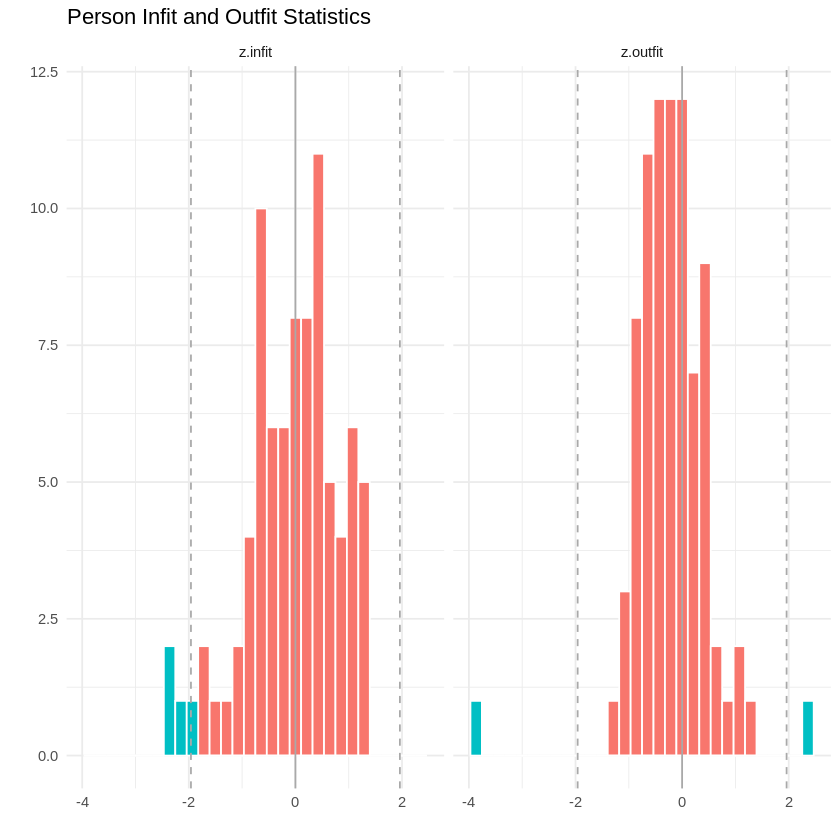

In [19]:
personfitPlot(fit3PL)

**Typical IRT plots**

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


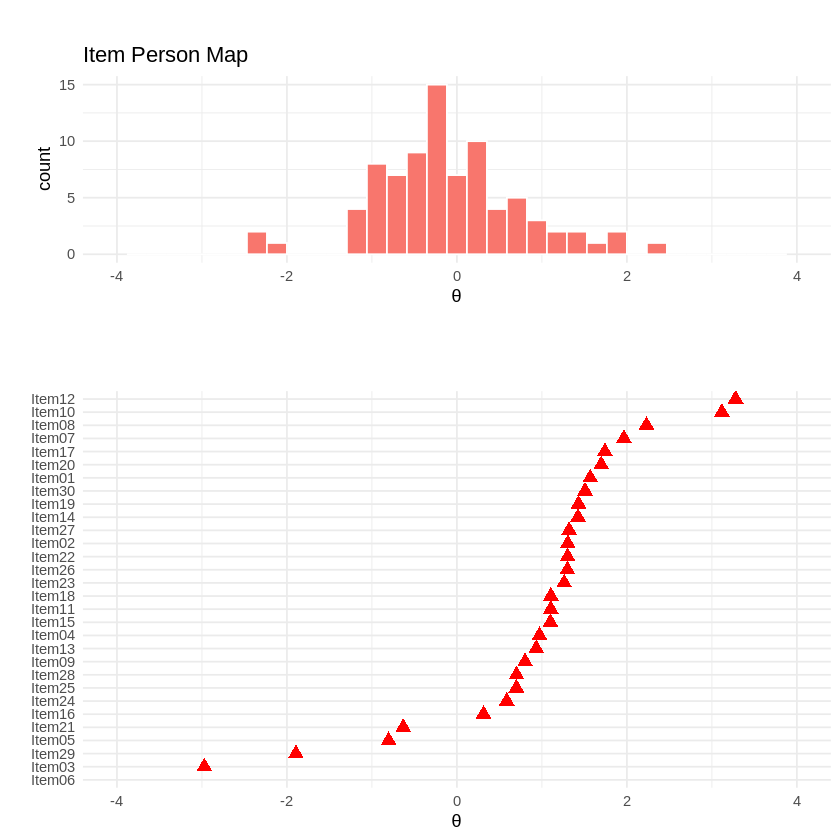

In [22]:
## Item Person Map (Wright Map)

itempersonMap(fit3PL)

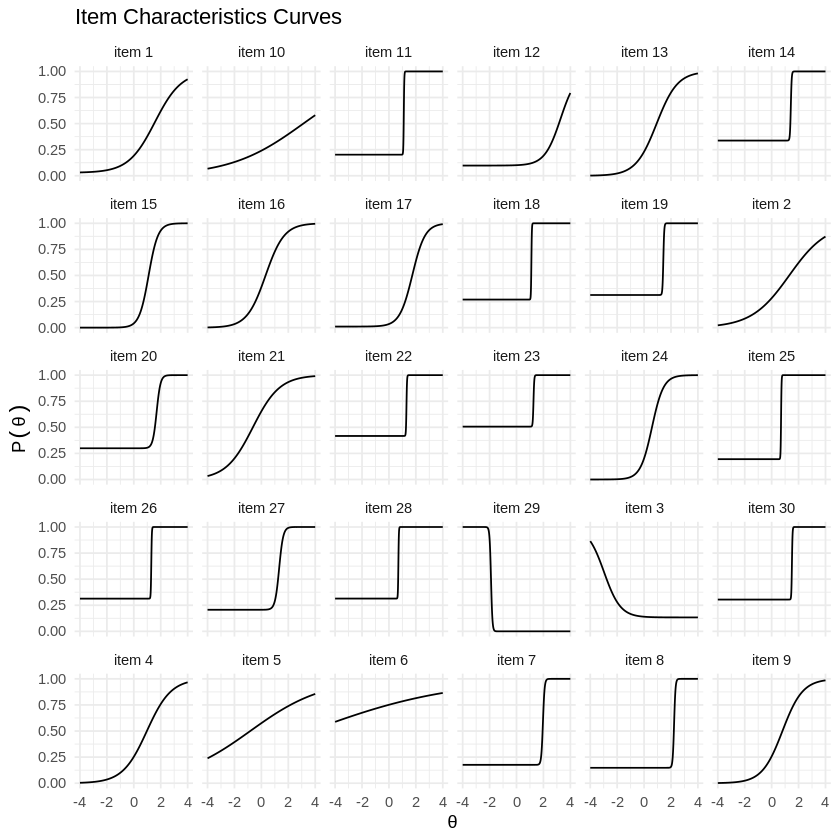

In [23]:
##  Item Characteristics Curves (Trace Plots)

tracePlot(fit3PL)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set3 is 12
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 14418 rows containing missing values (`geom_line()`).”


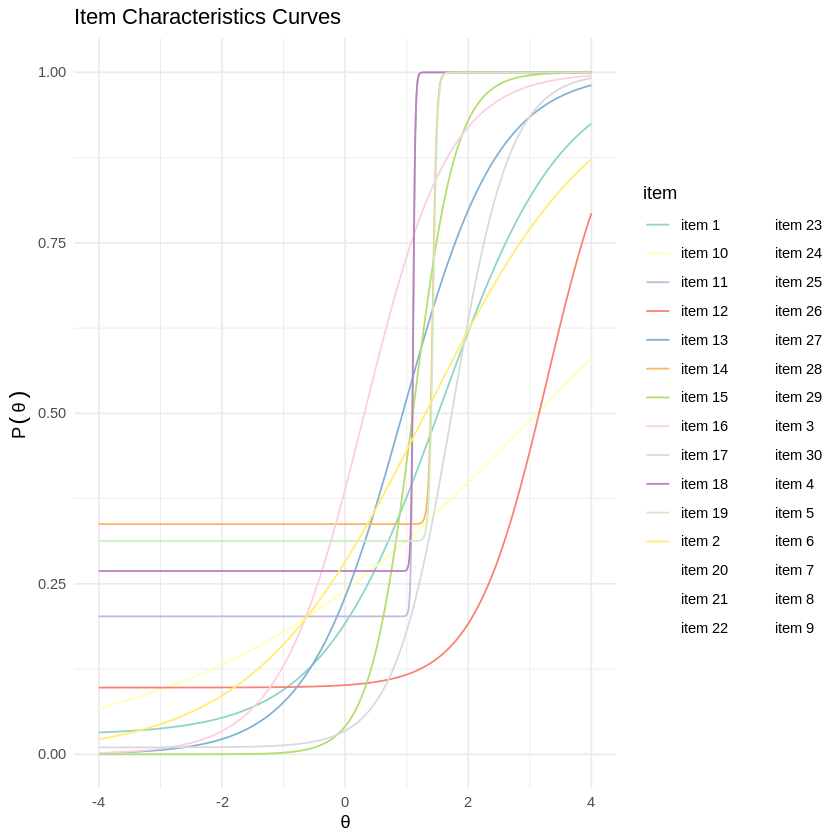

In [24]:
tracePlot(fit3PL, facet = F, legend = T) + scale_color_brewer(palette = "Set3")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


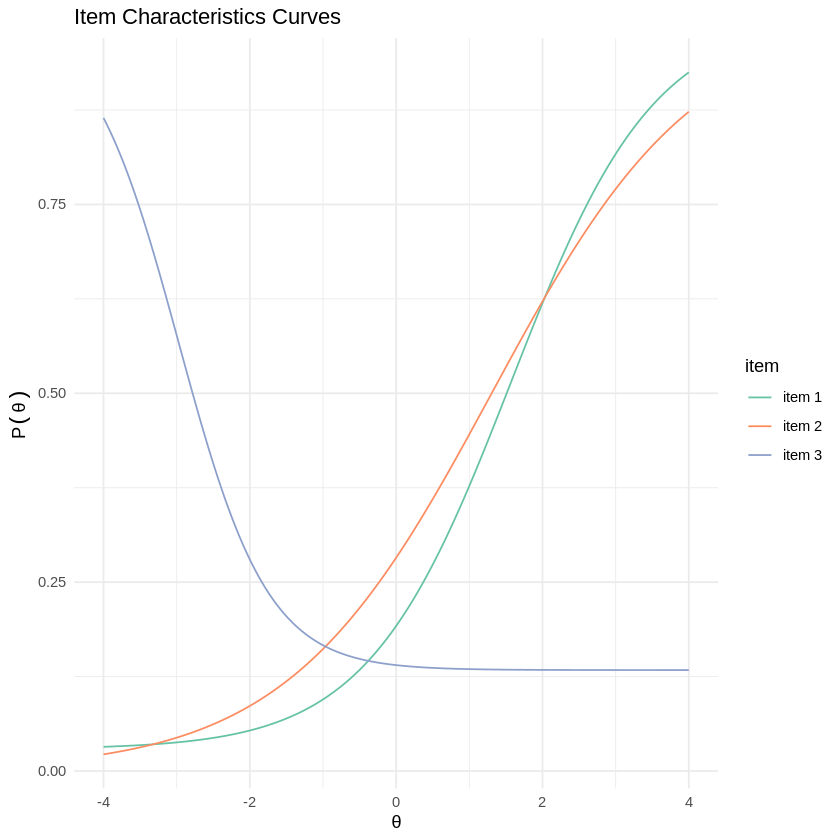

In [25]:
# Plotting only individual items
tracePlot(fit3PL,items = c(1:3), facet = F, legend = T) + scale_color_brewer(palette = "Set2")

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Oranges is 9
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 16821 rows containing missing values (`geom_line()`).”


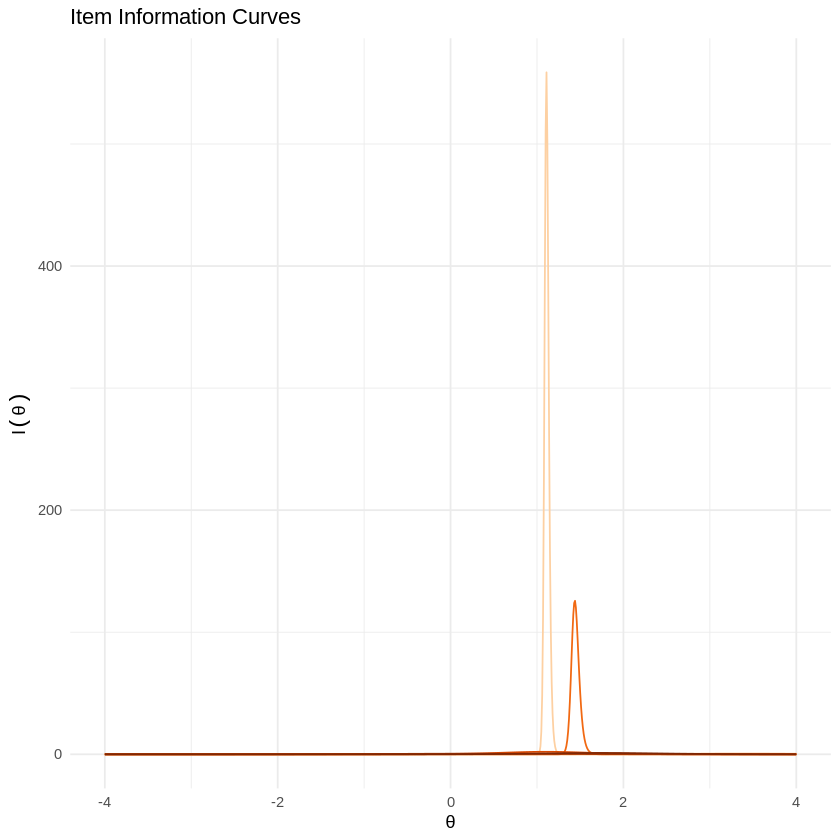

In [60]:
### Item Information Curves

#itemInfoPlot(fit3PL) + scale_color_brewer(palette = "Set3")
itemInfoPlot(fit3PL)

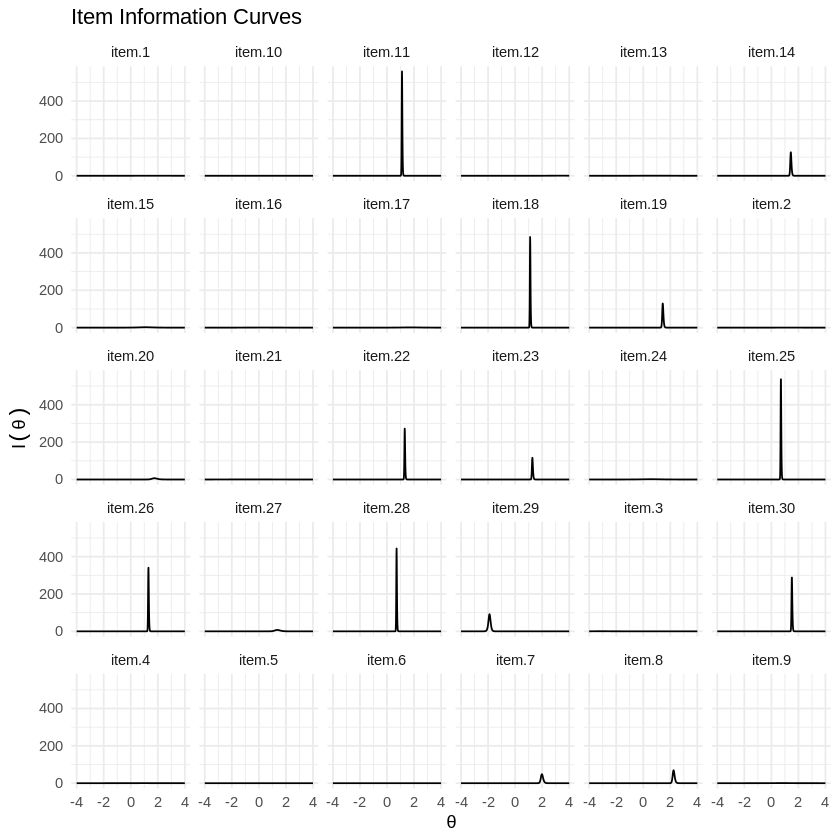

In [61]:
itemInfoPlot(fit3PL, facet = T)

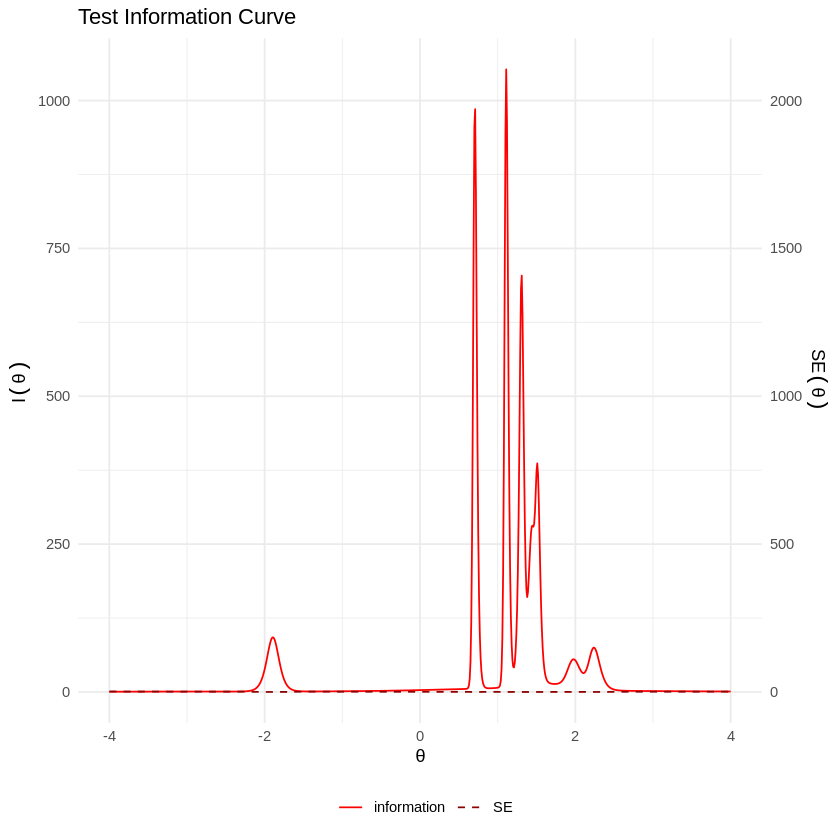

In [28]:
##  Test Information Curves

testInfoPlot(fit3PL, adj_factor = 2)

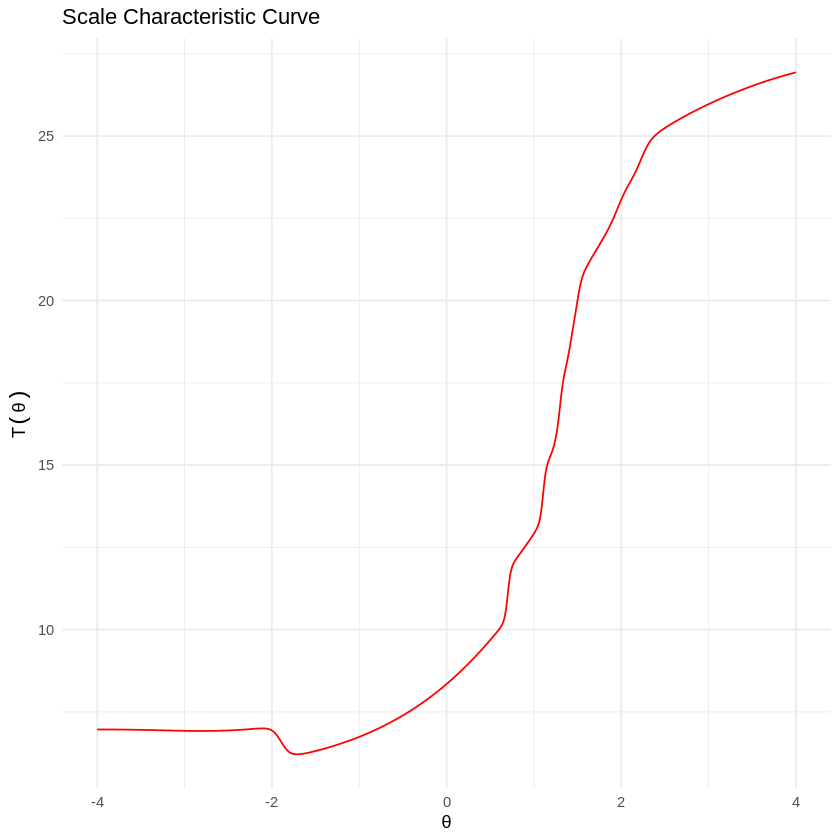

In [29]:
## Scale Characteristic Curves

scaleCharPlot(fit3PL)

In [63]:
score <- fscores(fit3PL)
sumscore <- rowSums(data)
cor.test(score, sumscore)


	Pearson's product-moment correlation

data:  score and sumscore
t = 12.144, df = 81, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7109220 0.8685896
sample estimates:
      cor 
0.8034168 
